# Identifying the best hotels of Chennai using Zomato API by Cyril Bastin 

In [105]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

In [78]:
address = 'Chennai city, India'

geolocator = Nominatim(user_agent="zomato")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

13.0801721 80.2838331


Zomato is the most commonly used service for hotels in Chennai, Tamil Nadu. It has an API called "Zomato API" . Zomato provides details of hotels and provide the following information: Search for restaurants by name, cuisine, or location, Display detailed information including ratings, location and cuisine, Zomato Foodie Index to show great areas to dine in a city. 

In [3]:
url = "https://developers.zomato.com/api/v2.1/geocode?lat={}&lon={}".format(latitude,longitude)
header = {"User-agent": "curl/7.43.0", "Accept": "application/json", "user_key": "59ad9f7a87183ea59358841233816b92"}

In [4]:
results = requests.get(url = url,headers=header).json()
results

{'location': {'entity_type': 'subzone',
  'entity_id': 6008,
  'title': 'Park Town',
  'latitude': '13.0798960000',
  'longitude': '80.2751110000',
  'city_id': 7,
  'city_name': 'Chennai',
  'country_id': 1,
  'country_name': 'India'},
 'popularity': {'popularity': '4.33',
  'nightlife_index': '0.98',
  'nearby_res': ['66330',
   '67408',
   '66334',
   '71679',
   '66342',
   '66312',
   '68329',
   '18428769',
   '67366'],
  'top_cuisines': ['North Indian',
   'South Indian',
   'Chinese',
   'Fast Food',
   'Beverages'],
  'popularity_res': '100',
  'nightlife_res': '10',
  'subzone': 'Park Town',
  'subzone_id': 6008,
  'city': 'Chennai'},
 'link': 'https://www.zomato.com/chennai/park-town-restaurants',
 'nearby_restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 66330,
     'is_grocery_store': False},
    'apikey': '59ad9f7a87183ea59358841233816b92',
    'id': '66330',
    'name': 'Kakada Ramprasad',
    'url': 'https://w

In [5]:
city = results['location']['city_name']
city

'Chennai'

Unlike other popular APIs like Foursquare, etc. Zomato has a limit of retrieving just 20 set of data at a time in free version. Hence, the data retrieved in a loop to receive a list of 100 hotels beyond which premium it becomes premium.

In [6]:
header = {"User-agent": "curl/7.43.0", "Accept": "application/json", "user_key": "59ad9f7a87183ea59358841233816b92"}


def getStart(start):
    urlLoc = "https://developers.zomato.com/api/v2.1/search?city_name={}&lat={}&lon={}&start={}&count=20".format(city,latitude,longitude,start)
    resultsLoc = requests.get(url = urlLoc,headers=header).json()
    resultLocFinal.append(resultsLoc['restaurants'])
    
start = 0
resultLocFinal=[]
getStart(start)
for i in range(0,100,20):
    i += 20
    getStart(i)
    


# The data limit of 100 rows is retrieved successfully

In [7]:
df=pd.DataFrame([])
for i in range(0,(len(resultLocFinal)-1)):
    df=df.append((json_normalize(resultLocFinal[i])),ignore_index=True)
                 
df.shape                 

C:\ProgramData\WatsonStudioDesktop\miniconda3\envs\desktop\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(100, 59)

In [8]:
df.columns

Index(['restaurant.R.has_menu_status.delivery',
       'restaurant.R.has_menu_status.takeaway',
       'restaurant.R.is_grocery_store', 'restaurant.R.res_id',
       'restaurant.all_reviews.reviews', 'restaurant.all_reviews_count',
       'restaurant.apikey', 'restaurant.average_cost_for_two',
       'restaurant.book_again_url', 'restaurant.book_form_web_view_url',
       'restaurant.book_url', 'restaurant.cuisines', 'restaurant.currency',
       'restaurant.deeplink', 'restaurant.establishment',
       'restaurant.establishment_types', 'restaurant.events_url',
       'restaurant.featured_image', 'restaurant.has_online_delivery',
       'restaurant.has_table_booking', 'restaurant.highlights',
       'restaurant.id', 'restaurant.include_bogo_offers',
       'restaurant.is_book_form_web_view', 'restaurant.is_delivering_now',
       'restaurant.is_table_reservation_supported',
       'restaurant.is_zomato_book_res', 'restaurant.location.address',
       'restaurant.location.city', 'restau

In [9]:
df.to_csv("Restaurant_Zomato_Chennai.csv")
df_data = df

In [17]:
df_data.columns

Index(['restaurant.R.res_id', 'restaurant.all_reviews_count',
       'restaurant.average_cost_for_two', 'restaurant.cuisines',
       'restaurant.establishment', 'restaurant.events_url',
       'restaurant.has_online_delivery', 'restaurant.highlights',
       'restaurant.is_table_reservation_supported',
       'restaurant.location.address', 'restaurant.location.city',
       'restaurant.location.city_id', 'restaurant.location.country_id',
       'restaurant.location.latitude', 'restaurant.location.locality',
       'restaurant.location.locality_verbose', 'restaurant.location.longitude',
       'restaurant.location.zipcode', 'restaurant.medio_provider',
       'restaurant.menu_url', 'restaurant.mezzo_provider', 'restaurant.name',
       'restaurant.offers', 'restaurant.opentable_support',
       'restaurant.phone_numbers', 'restaurant.photo_count',
       'restaurant.photos_url', 'restaurant.price_range',
       'restaurant.store_type', 'restaurant.switch_to_order_menu',
       'restaur

In [19]:
df.drop(['restaurant.location.city_id', 'restaurant.location.country_id','restaurant.location.locality_verbose',
         'restaurant.medio_provider','restaurant.menu_url', 'restaurant.mezzo_provider',
         'restaurant.photo_count','restaurant.photos_url','restaurant.switch_to_order_menu',
        'restaurant.thumb','restaurant.url','restaurant.user_rating.rating_obj.bg_color.tint',
       'restaurant.user_rating.rating_obj.bg_color.type','restaurant.user_rating.rating_obj.title.text','restaurant.zomato_events'], axis = 1, inplace = True) 
df_data

,restaurant.R.res_id,restaurant.all_reviews_count,restaurant.average_cost_for_two,restaurant.cuisines,restaurant.establishment,restaurant.events_url,restaurant.has_online_delivery,restaurant.highlights,restaurant.is_table_reservation_supported,restaurant.location.address,...,restaurant.offers,restaurant.opentable_support,restaurant.phone_numbers,restaurant.price_range,restaurant.store_type,restaurant.timings,restaurant.user_rating.aggregate_rating,restaurant.user_rating.rating_color,restaurant.user_rating.rating_text,restaurant.user_rating.votes
0,70496,1163,1000,"Biryani, North Indian, Mughlai, Chinese, Bever...",[Casual Dining],https://www.zomato.com/chennai/sukkubhai-biriy...,1,"[Lunch, Cash, Takeaway Available, Breakfast, D...",0,"New 14, Old 11/3Q, Railway Station Road, MKN R...",...,[],0,044 22330444,3,,9:30am – 11pm (Mon-Sun),4.3,5BA829,Very Good,45755
1,71171,730,600,"Biryani, Chinese, Tamil, Beverages",[Quick Bites],https://www.zomato.com/chennai/yaa-mohaideen-b...,1,"[Delivery, Dinner, Takeaway Available, Lunch, ...",0,"Old Shop 4/158, Church Road, Opposite Uzhavar ...",...,[],0,+91 9944550066,2,,11 AM – 10 PM,4.5,3F7E00,Excellent,3700
2,71492,1093,1100,"Cafe, Italian, American",[Café],https://www.zomato.com/chennai/ciclo-cafe-kott...,1,"[Dinner, Cash, Delivery, Credit Card, Lunch, T...",0,"47, Gandhi Mandapam Road, Kotturpuram, Chennai",...,[],0,"044 42048666, +91 9500065164",3,,"11am – 11pm (Mon-Sat),8am – 11pm (Sun)",4.2,5BA829,Very Good,2731
3,72735,662,1700,"European, Continental, Italian, North Indian, ...",[Casual Dining],https://www.zomato.com/chennai/east-coast-at-m...,1,"[Credit Card, Lunch, Serves Alcohol, Cash, Tak...",1,"Kandanchavadi, Old Mahabalipuram Road, Santhos...",...,[],0,+91 7338923775,3,,11am – 11pm (Mon-Sun),4.6,3F7E00,Excellent,1319
4,67280,632,350,Momos,[Quick Bites],https://www.zomato.com/chennai/momo-sa-khang-b...,1,"[Lunch, Cash, Takeaway Available, Debit Card, ...",0,"2/247, Perinbavilas Complex, Opposite Chitra A...",...,[],0,+91 9840261399,1,,"12noon – 7pm (Mon, Tue, Thu, Fri, Sat, Sun), 1...",4.7,3F7E00,Excellent,4662
5,70497,1123,1500,"Fast Food, Italian, Salad",[Fine Dining],https://www.zomato.com/chennai/basil-with-a-tw...,1,"[Takeaway Available, Breakfast, Debit Card, No...",1,"58-A, Habibullah Road, T. Nagar, Chennai",...,[],0,"+91 9841085611, +91 9840022233",3,,"11am – 9pm (Mon),11am – 10pm (Tue-Sun)",4.4,5BA829,Very Good,3089
6,70890,1488,400,Fast Food,[Quick Bites],https://www.zomato.com/chennai/fusilli-reasons...,1,"[Dinner, Cash, Takeaway Available, Debit Card,...",0,"2/64, Ormes Main Road, Kilpauk, Chennai",...,[],0,"044 48508022, +91 9840870060",1,,12:30 PM to 11 PM,4.6,3F7E00,Excellent,7034
7,70431,1357,750,"Continental, American, Italian, Desserts, Beve...",[Casual Dining],https://www.zomato.com/chennai/pantry-dor-anna...,1,"[Lunch, Takeaway Available, Debit Card, Dinner...",1,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",...,[],0,"+91 9498484112, 044 2621211",2,,"10 AM to 11:30 PM (Mon-Thu), 8:30 AM to 11:30 ...",4.3,5BA829,Very Good,12260
8,18583453,559,700,Middle Eastern,[Casual Dining],https://www.zomato.com/chennai/mezze-alwarpet/...,1,"[Dinner, Delivery, Credit Card, Lunch, Cash, T...",0,"Abhinav center, old no.19, new, no.14, Co Oper...",...,[],0,"+91 7604853796, +91 9789763192, +91 9840704051",2,,"11:30am – 3:30pm, 6:30pm – 10pm (Mon-Sun)",4.4,5BA829,Very Good,3495
9,18423075,1066,600,"Cafe, American",[Café],https://www.zomato.com/chennai/writers-cafe-go...,1,"[Dinner, Cash, Delivery, Credit Card, Lunch, T...",0,"98, Peter's Road, Near Philip's Service Centre...",...,[],0,044 48611604,2,,9 AM to 10:30 PM,4.3,5BA829,Very Good,2887


In [24]:
df_data.columns

Index(['restaurant.R.res_id', 'restaurant.all_reviews_count',
       'restaurant.average_cost_for_two', 'restaurant.cuisines',
       'restaurant.establishment', 'restaurant.events_url',
       'restaurant.has_online_delivery', 'restaurant.highlights',
       'restaurant.is_table_reservation_supported',
       'restaurant.location.address', 'restaurant.location.city',
       'restaurant.location.latitude', 'restaurant.location.locality',
       'restaurant.location.longitude', 'restaurant.location.zipcode',
       'restaurant.name', 'restaurant.offers', 'restaurant.opentable_support',
       'restaurant.phone_numbers', 'restaurant.price_range',
       'restaurant.store_type', 'restaurant.timings',
       'restaurant.user_rating.aggregate_rating',
       'restaurant.user_rating.rating_color',
       'restaurant.user_rating.rating_text', 'restaurant.user_rating.votes'],
      dtype='object')

# DataFrame

In [27]:
df_data.rename(columns={'restaurant.R.res_id':"Restaurant ID", 'restaurant.all_reviews_count':'Reviews Count',
       'restaurant.average_cost_for_two':'Avg Cost for Two', 'restaurant.cuisines':'Cuisines',
       'restaurant.establishment':'Establishment', 'restaurant.events_url':'Events URL',
       'restaurant.has_online_delivery':'Online Delivery Status', 'restaurant.highlights':'Highlights',
       'restaurant.is_table_reservation_supported':'Is Table Reserved',
       'restaurant.location.address':'Address', 'restaurant.location.city':'City',
       'restaurant.location.latitude':'Latitude', 'restaurant.location.locality':'Locality',
       'restaurant.location.longitude':'Longitude', 'restaurant.location.zipcode':'ZipCode',
       'restaurant.name':'Restaurant Name', 'restaurant.offers':'Offers', 'restaurant.opentable_support':'Open Table Support',
       'restaurant.phone_numbers':'PhoneNo', 'restaurant.price_range':'Price Range',
       'restaurant.store_type':'Store Type', 'restaurant.timings': 'Timings',
       'restaurant.user_rating.aggregate_rating':'Aggregate Rating',
       'restaurant.user_rating.rating_color':'UserRating Color',
       'restaurant.user_rating.rating_text':'UserRating Text', 'restaurant.user_rating.votes':'UserRating Votes'},inplace=True)
df_data

,Restaurant ID,Reviews Count,Avg Cost for Two,Cuisines,Establishment,Events URL,Online Delivery Status,Highlights,Is Table Reserved,Address,...,Offers,Open Table Support,PhoneNo,Price Range,Store Type,Timings,Aggregate Rating,UserRating Color,UserRating Text,UserRating Votes
0,70496,1163,1000,"Biryani, North Indian, Mughlai, Chinese, Bever...",[Casual Dining],https://www.zomato.com/chennai/sukkubhai-biriy...,1,"[Lunch, Cash, Takeaway Available, Breakfast, D...",0,"New 14, Old 11/3Q, Railway Station Road, MKN R...",...,[],0,044 22330444,3,,9:30am – 11pm (Mon-Sun),4.3,5BA829,Very Good,45755
1,71171,730,600,"Biryani, Chinese, Tamil, Beverages",[Quick Bites],https://www.zomato.com/chennai/yaa-mohaideen-b...,1,"[Delivery, Dinner, Takeaway Available, Lunch, ...",0,"Old Shop 4/158, Church Road, Opposite Uzhavar ...",...,[],0,+91 9944550066,2,,11 AM – 10 PM,4.5,3F7E00,Excellent,3700
2,71492,1093,1100,"Cafe, Italian, American",[Café],https://www.zomato.com/chennai/ciclo-cafe-kott...,1,"[Dinner, Cash, Delivery, Credit Card, Lunch, T...",0,"47, Gandhi Mandapam Road, Kotturpuram, Chennai",...,[],0,"044 42048666, +91 9500065164",3,,"11am – 11pm (Mon-Sat),8am – 11pm (Sun)",4.2,5BA829,Very Good,2731
3,72735,662,1700,"European, Continental, Italian, North Indian, ...",[Casual Dining],https://www.zomato.com/chennai/east-coast-at-m...,1,"[Credit Card, Lunch, Serves Alcohol, Cash, Tak...",1,"Kandanchavadi, Old Mahabalipuram Road, Santhos...",...,[],0,+91 7338923775,3,,11am – 11pm (Mon-Sun),4.6,3F7E00,Excellent,1319
4,67280,632,350,Momos,[Quick Bites],https://www.zomato.com/chennai/momo-sa-khang-b...,1,"[Lunch, Cash, Takeaway Available, Debit Card, ...",0,"2/247, Perinbavilas Complex, Opposite Chitra A...",...,[],0,+91 9840261399,1,,"12noon – 7pm (Mon, Tue, Thu, Fri, Sat, Sun), 1...",4.7,3F7E00,Excellent,4662
5,70497,1123,1500,"Fast Food, Italian, Salad",[Fine Dining],https://www.zomato.com/chennai/basil-with-a-tw...,1,"[Takeaway Available, Breakfast, Debit Card, No...",1,"58-A, Habibullah Road, T. Nagar, Chennai",...,[],0,"+91 9841085611, +91 9840022233",3,,"11am – 9pm (Mon),11am – 10pm (Tue-Sun)",4.4,5BA829,Very Good,3089
6,70890,1488,400,Fast Food,[Quick Bites],https://www.zomato.com/chennai/fusilli-reasons...,1,"[Dinner, Cash, Takeaway Available, Debit Card,...",0,"2/64, Ormes Main Road, Kilpauk, Chennai",...,[],0,"044 48508022, +91 9840870060",1,,12:30 PM to 11 PM,4.6,3F7E00,Excellent,7034
7,70431,1357,750,"Continental, American, Italian, Desserts, Beve...",[Casual Dining],https://www.zomato.com/chennai/pantry-dor-anna...,1,"[Lunch, Takeaway Available, Debit Card, Dinner...",1,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",...,[],0,"+91 9498484112, 044 2621211",2,,"10 AM to 11:30 PM (Mon-Thu), 8:30 AM to 11:30 ...",4.3,5BA829,Very Good,12260
8,18583453,559,700,Middle Eastern,[Casual Dining],https://www.zomato.com/chennai/mezze-alwarpet/...,1,"[Dinner, Delivery, Credit Card, Lunch, Cash, T...",0,"Abhinav center, old no.19, new, no.14, Co Oper...",...,[],0,"+91 7604853796, +91 9789763192, +91 9840704051",2,,"11:30am – 3:30pm, 6:30pm – 10pm (Mon-Sun)",4.4,5BA829,Very Good,3495
9,18423075,1066,600,"Cafe, American",[Café],https://www.zomato.com/chennai/writers-cafe-go...,1,"[Dinner, Cash, Delivery, Credit Card, Lunch, T...",0,"98, Peter's Road, Near Philip's Service Centre...",...,[],0,044 48611604,2,,9 AM to 10:30 PM,4.3,5BA829,Very Good,2887


In [28]:
df_data.to_csv("Restaurant_Zomato_Chennai_Final.csv") 

Price Range = Avg cost for two (0-500 = 1; 501-1000 = 2; 1001-2000=3, 2000-3000 = 4)

4.5 and above = Excellent,
4.1 - 4.5 = Very Good,
3.1 - 4 = Good,
2.1 - 3 = Bad,
1 - 2 = Very Bad

In [86]:
df_data1=pd.read_csv("Restaurant_Zomato_Chennai_Final.csv") 
df_data1.head(3)

,Restaurant ID,Restaurant Name,Reviews Count,Avg Cost for Two,Cuisines,Establishment,Online Delivery Status,Highlights,Is Table Reserved,Address,City,Latitude,Locality,Longitude,Price Range,Aggregate Rating,UserRating Color,UserRating Text,UserRating Votes
0,70496,Sukkubhai Biriyani,1163,1000,"Biryani, North Indian, Mughlai, Chinese, Bever...",['Casual Dining'],1,"['Lunch', 'Cash', 'Takeaway Available', 'Break...",0,"New 14, Old 11/3Q, Railway Station Road, MKN R...",Chennai,13.000380,Alandur,80.200623,3,4.3,5BA829,Very Good,45755
1,71171,Yaa Mohaideen Biryani,730,600,"Biryani, Chinese, Tamil, Beverages",['Quick Bites'],1,"['Delivery', 'Dinner', 'Takeaway Available', '...",0,"Old Shop 4/158, Church Road, Opposite Uzhavar ...",Chennai,12.970815,Pallavaram,80.147182,2,4.5,3F7E00,Excellent,3700
2,71492,Ciclo Cafe,1093,1100,"Cafe, Italian, American",['Caf??'],1,"['Dinner', 'Cash', 'Delivery', 'Credit Card', ...",0,"47, Gandhi Mandapam Road, Kotturpuram, Chennai",Chennai,13.022305,Kotturpuram,80.242340,3,4.2,5BA829,Very Good,2731


In [87]:
df_data1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Reviews Count', 'Avg Cost for Two',
       'Cuisines', 'Establishment', 'Online Delivery Status', 'Highlights',
       'Is Table Reserved', 'Address', 'City', 'Latitude', 'Locality',
       'Longitude', 'Price Range', 'Aggregate Rating', 'UserRating Color',
       'UserRating Text', 'UserRating Votes'],
      dtype='object')

In [88]:
print(df_data1.shape)
df_data1.dropna(axis=0,inplace=True)
# df.reset_index(drop=True, inplace=True)  
df_data1.shape

(100, 19)


(100, 19)

### Correlation

In [89]:
df_data1.corr()

,Restaurant ID,Reviews Count,Avg Cost for Two,Online Delivery Status,Is Table Reserved,Latitude,Longitude,Price Range,Aggregate Rating,UserRating Votes
Restaurant ID,1.000000,-0.073941,-0.026571,0.082626,0.014346,-0.006755,0.155237,-0.026280,-0.137151,-0.132926
Reviews Count,-0.073941,1.000000,0.121256,-0.189648,0.106897,-0.068459,-0.245518,0.148906,0.035161,0.314869
Avg Cost for Two,-0.026571,0.121256,1.000000,-0.180692,0.324196,-0.288308,-0.025134,0.880932,-0.027015,-0.249351
Online Delivery Status,0.082626,-0.189648,-0.180692,1.000000,0.072070,0.201049,0.011246,-0.125178,-0.042094,0.167953
Is Table Reserved,0.014346,0.106897,0.324196,0.072070,1.000000,-0.074317,0.019475,0.365287,-0.214136,-0.159232
Latitude,-0.006755,-0.068459,-0.288308,0.201049,-0.074317,1.000000,0.162088,-0.240806,0.031585,0.107783
Longitude,0.155237,-0.245518,-0.025134,0.011246,0.019475,0.162088,1.000000,-0.061461,0.041638,-0.436646
Price Range,-0.026280,0.148906,0.880932,-0.125178,0.365287,-0.240806,-0.061461,1.000000,-0.110972,-0.170020
Aggregate Rating,-0.137151,0.035161,-0.027015,-0.042094,-0.214136,0.031585,0.041638,-0.110972,1.000000,-0.037932
UserRating Votes,-0.132926,0.314869,-0.249351,0.167953,-0.159232,0.107783,-0.436646,-0.170020,-0.037932,1.000000


### Description of the data

In [90]:
df_data1.describe()

,Restaurant ID,Reviews Count,Avg Cost for Two,Online Delivery Status,Is Table Reserved,Latitude,Longitude,Price Range,Aggregate Rating,UserRating Votes
count,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.351519e+06,953.22000,989.500000,0.840000,0.520000,13.024195,80.243054,2.410000,4.259000,5662.080000
std,8.796904e+06,1111.55469,480.650601,0.368453,0.502117,0.060068,0.024156,0.753376,0.231855,8531.025591
min,6.505500e+04,252.00000,100.000000,0.000000,0.000000,12.627392,80.147182,1.000000,3.400000,542.000000
25%,6.858775e+04,460.75000,687.500000,1.000000,0.000000,13.005609,80.236725,2.000000,4.100000,1246.250000
50%,7.167000e+04,625.50000,1000.000000,1.000000,1.000000,13.037900,80.249870,3.000000,4.250000,2348.500000
75%,1.844549e+07,1040.00000,1400.000000,1.000000,1.000000,13.057179,80.255481,3.000000,4.400000,5885.750000
max,1.895357e+07,7213.00000,2500.000000,1.000000,1.000000,13.092185,80.277568,4.000000,4.700000,49385.000000


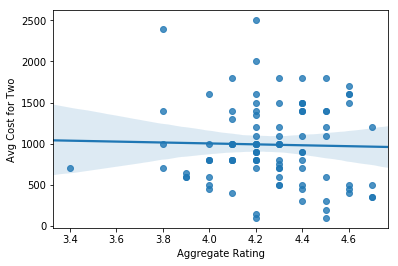

In [91]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

sns.regplot(x="Aggregate Rating", y="Avg Cost for Two", data=df_data1)

In [92]:
df_data1['UserRating Text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average'], dtype=object)

In [93]:
# label_encoder = preprocessing.LabelEncoder()
# label_encoder.fit(['Average', 'Good','Very Good','Excellent'])
# df_data1['UserRating TextValue']= label_encoder.transform(df_data1['UserRating Text']) 
df_data1['UserRating TextValue'] = df_data1['UserRating Text']
df_data1['UserRating TextValue'].replace(to_replace=['Average','Good','Very Good','Excellent'], value=[1,2,3,4],inplace=True)

In [94]:
df_data1['UserRating TextValue'].unique()

array([3, 4, 2, 1], dtype=int64)

## Distribution of the data

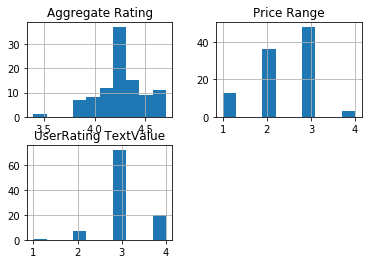

In [95]:
import matplotlib.pyplot as plt


histographs = df_data1[['Price Range','Aggregate Rating','UserRating TextValue']]
histographs.hist()
plt.show()
# plt.pyplot.hist(df_data1["Price Range"])

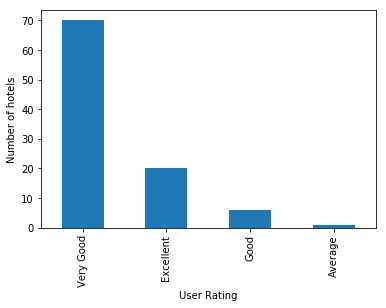

In [132]:
yplot = df_data1['UserRating Text'].value_counts()
# sns.barplot(x='UserRating Text' , data=df_data1)
yplot.plot(kind = 'bar', x='UserRating Text')
plt.xlabel("User Rating")
plt.ylabel("Number of hotels")
plt.show()

In [97]:
yplot = df_data1['UserRating Text'].value_counts()
yplot

Very Good    72
Excellent    20
Good          7
Average       1
Name: UserRating Text, dtype: int64

## Code to remove outliers

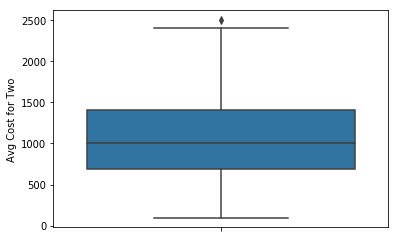

In [98]:
sns.boxplot(y="Avg Cost for Two", data=df_data1) 

In [99]:
df_data1.drop((df_data1[df_data1["Avg Cost for Two"] > (0.75*max(df_data1["Avg Cost for Two"]))].index),inplace = True)

In [100]:
df_data1.shape

(97, 20)

In [26]:
# locations = df_data1[['Latitude', 'Longitude']]
# locationlist = locations.values.tolist()
# # len(locationlist)
# locationlist[21]

[13.00485796, 80.25270224]

In [101]:
df_data1.rename(columns = {"Restaurant Name":"RestaurantName","UserRating Color":"UserRatingColor"},inplace=True)

In [110]:
df_data1['UserRatingColor'] = '#' + df_data1['UserRatingColor'].astype(str)
df_data1.head(2)

,Restaurant ID,RestaurantName,Reviews Count,Avg Cost for Two,Cuisines,Establishment,Online Delivery Status,Highlights,Is Table Reserved,Address,City,Latitude,Locality,Longitude,Price Range,Aggregate Rating,UserRatingColor,UserRating Text,UserRating Votes,UserRating TextValue
0,70496,Sukkubhai Biriyani,1163,1000,"Biryani, North Indian, Mughlai, Chinese, Bever...",['Casual Dining'],1,"['Lunch', 'Cash', 'Takeaway Available', 'Break...",0,"New 14, Old 11/3Q, Railway Station Road, MKN R...",Chennai,13.000380,Alandur,80.200623,3,4.3,#5BA829,Very Good,45755,3
1,71171,Yaa Mohaideen Biryani,730,600,"Biryani, Chinese, Tamil, Beverages",['Quick Bites'],1,"['Delivery', 'Dinner', 'Takeaway Available', '...",0,"Old Shop 4/158, Church Road, Opposite Uzhavar ...",Chennai,12.970815,Pallavaram,80.147182,2,4.5,#3F7E00,Excellent,3700,4


### The latitude and longitude data were separately collected and merged to the dataframe based on the area.

In [122]:
from folium import plugins
from IPython.display import HTML, display

# labels = list(df_data1.RestaurantName)

chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
hotels = plugins.MarkerCluster().add_to(chennai_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, lab, col in zip(df_data1.Latitude, df_data1.Longitude, df_data1.RestaurantName,df_data1.UserRatingColor):
    label = folium.Popup(str(lab), parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
#         icon=folium.Icon(color=col, icon_color='white', icon='male', angle=0, prefix='fa',
        popup= label,
        color="red",
        fill=True,
        fill_color=col,
        fill_opacity=1
    ).add_to(hotels)

chennai_map



# K-Means Clustering

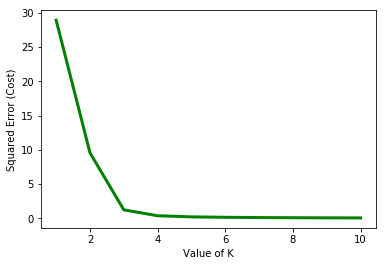

In [123]:
from sklearn.cluster import KMeans

X = df_data1[['Latitude','Longitude','UserRating TextValue']]
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
      
    cost.append(KM.inertia_)      

plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error (Cost)") 
plt.show()

In [125]:
clusterNum = 3
print ("The best possible K value = " + str(clusterNum))
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
df_data1["Classifier"] = labels
df_data1.head()

The best possible K value = 3


,Restaurant ID,RestaurantName,Reviews Count,Avg Cost for Two,Cuisines,Establishment,Online Delivery Status,Highlights,Is Table Reserved,Address,...,Latitude,Locality,Longitude,Price Range,Aggregate Rating,UserRatingColor,UserRating Text,UserRating Votes,UserRating TextValue,Classifier
0,70496,Sukkubhai Biriyani,1163,1000,"Biryani, North Indian, Mughlai, Chinese, Bever...",['Casual Dining'],1,"['Lunch', 'Cash', 'Takeaway Available', 'Break...",0,"New 14, Old 11/3Q, Railway Station Road, MKN R...",...,13.000380,Alandur,80.200623,3,4.3,#5BA829,Very Good,45755,3,0
1,71171,Yaa Mohaideen Biryani,730,600,"Biryani, Chinese, Tamil, Beverages",['Quick Bites'],1,"['Delivery', 'Dinner', 'Takeaway Available', '...",0,"Old Shop 4/158, Church Road, Opposite Uzhavar ...",...,12.970815,Pallavaram,80.147182,2,4.5,#3F7E00,Excellent,3700,4,1
2,71492,Ciclo Cafe,1093,1100,"Cafe, Italian, American",['Caf??'],1,"['Dinner', 'Cash', 'Delivery', 'Credit Card', ...",0,"47, Gandhi Mandapam Road, Kotturpuram, Chennai",...,13.022305,Kotturpuram,80.242340,3,4.2,#5BA829,Very Good,2731,3,0
3,72735,East Coast at Madras Square,662,1700,"European, Continental, Italian, North Indian, ...",['Casual Dining'],1,"['Credit Card', 'Lunch', 'Serves Alcohol', 'Ca...",1,"Kandanchavadi, Old Mahabalipuram Road, Santhos...",...,12.965559,Perungudi,80.247601,3,4.6,#3F7E00,Excellent,1319,4,1
4,67280,Momo Sa-Khang by Kailash Kitchen,632,350,Momos,['Quick Bites'],1,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",0,"2/247, Perinbavilas Complex, Opposite Chitra A...",...,13.065430,Choolaimedu,80.230988,1,4.7,#3F7E00,Excellent,4662,4,1


In [127]:
df_data1['Classifier'].value_counts()

0    70
1    20
2     7
Name: Classifier, dtype: int64

## Map based on the clustering value

In [130]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

map_chennai_cluster = folium.Map(location=[latitude, longitude], zoom_start=10)

xs = np.arange(clusterNum)
ys = [i + xs + (i*xs)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


for lat, lng, res, rating,cluster in zip(df_data1['Latitude'], df_data1['Longitude'], df_data1['RestaurantName'], df_data1['UserRating Text'], df_data1['Classifier']):
    
    label = folium.Popup('Restaurant Name: ' + str(res) + ' ,Rating: ' + str(rating), parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai_cluster)  
    
map_chennai_cluster

In [212]:
df_data1["Locality"].value_counts()

Alwarpet                                       10
Nungambakkam                                   10
Adyar                                           9
Mylapore                                        7
T. Nagar                                        7
Anna Nagar East                                 7
Besant Nagar                                    5
Velachery                                       3
Ashok Nagar                                     2
Pallavaram                                      2
Kotturpuram                                     2
Perungudi                                       2
Kilpauk                                         2
Royapettah                                      2
Foodies Kitchen                                 2
Gopalapuram                                     2
Triplicane                                      2
Kodambakkam                                     2
Egmore                                          2
Akkarai                                         1


In [221]:
counts = df_data1['Locality'].value_counts()

res = df_data1[df_data1['Locality'].isin(counts[counts > 4].index)]
res["Locality"].value_counts()

Alwarpet           10
Nungambakkam       10
Adyar               9
T. Nagar            7
Mylapore            7
Anna Nagar East     7
Besant Nagar        5
Name: Locality, dtype: int64

In [261]:
a = res.Cuisines.str.split(",",expand=True).stack().value_counts()
a
# res_dct = {a.index.values[i]: a[i + 1] for i in range(0, len(a.index.values), 2)}
# res_dct

 Beverages        18
 Italian          17
 Chinese          15
 Desserts         15
Cafe              13
 Continental      12
 North Indian     10
North Indian       7
 Fast Food         6
 Thai              6
 South Indian      5
 Salad             5
Continental        5
South Indian       5
 American          4
 Mexican           4
 European          3
 Ice Cream         3
 Japanese          3
 Asian             3
Asian              3
 Seafood           2
 Biryani           2
 Sushi             2
 Bakery            2
 Chettinad         2
Italian            2
Chinese            2
Fast Food          2
 Momos             2
Pizza              2
Singaporean        2
Arabian            1
 Mangalorean       1
 Steak             1
Desserts           1
Kerala             1
 Lebanese          1
 Maharashtrian     1
 French            1
 Kebab             1
 Malaysian         1
 Pizza             1
 Mediterranean     1
Mithai             1
 Street Food       1
Malaysian          1
 Sandwich    

## Split Cuisines

In [231]:
cuisines = df_data1['Cuisines'].str.split(",", expand = True)
cuisines

,0,1,2,3,4,5,6,7
0,Biryani,North Indian,Mughlai,Chinese,Beverages,Desserts,None,None
1,Biryani,Chinese,Tamil,Beverages,None,None,None,None
2,Cafe,Italian,American,None,None,None,None,None
3,European,Continental,Italian,North Indian,Beverages,None,None,None
4,Momos,None,None,None,None,None,None,None
5,Fast Food,Italian,Salad,None,None,None,None,None
6,Fast Food,None,None,None,None,None,None,None
7,Continental,American,Italian,Desserts,Beverages,None,None,None
8,Middle Eastern,None,None,None,None,None,None,None
9,Cafe,American,None,None,None,None,None,None


In [235]:
cuisines['Restaurant Name'] = df_data1['RestaurantName']
cuisines['Classifier'] = df_data1['Classifier']
cuisines

,0,1,2,3,4,5,6,7,Restaurant Name,Classifier
0,Biryani,North Indian,Mughlai,Chinese,Beverages,Desserts,None,None,Sukkubhai Biriyani,0
1,Biryani,Chinese,Tamil,Beverages,None,None,None,None,Yaa Mohaideen Biryani,1
2,Cafe,Italian,American,None,None,None,None,None,Ciclo Cafe,0
3,European,Continental,Italian,North Indian,Beverages,None,None,None,East Coast at Madras Square,1
4,Momos,None,None,None,None,None,None,None,Momo Sa-Khang by Kailash Kitchen,1
5,Fast Food,Italian,Salad,None,None,None,None,None,Basil With A Twist,0
6,Fast Food,None,None,None,None,None,None,None,Fusilli Reasons,1
7,Continental,American,Italian,Desserts,Beverages,None,None,None,Pantry d'or,0
8,Middle Eastern,None,None,None,None,None,None,None,Mezze,0
9,Cafe,American,None,None,None,None,None,None,Writer's Cafe,0


In [268]:
import nltk
# data = cuisines
top_N = 20
for i in range(0,7):
    word_dist[i] = nltk.FreqDist(cuisines[i])
    rslt=pd.DataFrame(word_dist[i].most_common(top_N),columns=['Word','Frequency'])
    a.append(rslt)
print('All frequencies')
print('='*60)


print(a)
print ('='*60)

All frequencies
 Beverages        18
 Italian          17
 Chinese          15
 Desserts         15
Cafe              13
 Continental      12
 North Indian     10
North Indian       7
 Fast Food         6
 Thai              6
 South Indian      5
 Salad             5
Continental        5
South Indian       5
 American          4
 Mexican           4
 European          3
 Ice Cream         3
 Japanese          3
 Asian             3
Asian              3
 Seafood           2
 Biryani           2
 Sushi             2
 Bakery            2
 Chettinad         2
Italian            2
Chinese            2
Fast Food          2
 Momos             2
Pizza              2
Singaporean        2
Arabian            1
 Mangalorean       1
 Steak             1
Desserts           1
Kerala             1
 Lebanese          1
 Maharashtrian     1
 French            1
 Kebab             1
 Malaysian         1
 Pizza             1
 Mediterranean     1
Mithai             1
 Street Food       1
Malaysian         

## Best Cuisines of Chennai

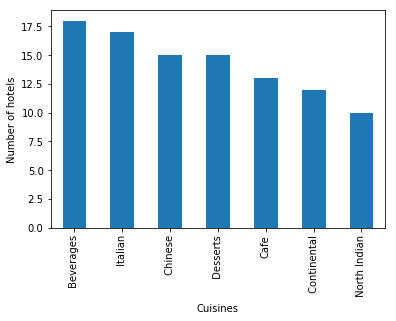

In [276]:
a[0:7].plot(kind = 'bar')
plt.xlabel("Cuisines")
plt.ylabel("Number of hotels")
plt.show()